# Proyecto Data Science AI Fundamentals

- Fecha de entrega: 26-27 Mayo 2022
- Semiramis Garcia de la Cruz

# Libraries

Importamos las librerías utilizadas

In [228]:
# Manipulacion de datos
import numpy as np
import pandas as pd

# Visualizacion de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Estadisticas
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from dmba.metric import AIC_score

# Regresiones
from sklearn.linear_model import LinearRegression
from dmba.featureSelection import stepwise_selection
from sklearn import model_selection


# Data Loading

Importamos los datos.

Las tenemos `29` variables en los datos. Documentación de la data en el link de [Notion.](https://pinnate-lace-fe6.notion.site/Proyecto-Regresi-n-y-Predicci-n-9d40ba17c9274b53bb260f4773544449)

In [229]:
data = pd.read_csv("Datasets/data_science.csv")
data.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [230]:
# Ejemplo de la informacion
data.sample(2).T

,51767,42601
timestamp,5/18/2021 10:54:58,2/20/2021 14:40:39
company,Publicis Sapient,Google
level,L2,L4
title,Product Designer,Software Engineer
totalyearlycompensation,90000,344000
location,"New York, NY","Mountain View, CA"
yearsofexperience,4.0,5.0
yearsatcompany,0.0,3.0
tag,User Research,ML / AI
basesalary,90000.0,158000.0


Con `info()` el número de columnas que tenemos, la cantidad de datos no nulos y el tipo de dato que contiene la columna.

In [231]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

Con `describe` observamos algunos estadísticos de los datos

In [232]:
data.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
count,6.264200e+04,62642.000000,62642.000000,6.264200e+04,6.264200e+04,62642.000000,62642.000000,62640.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000
mean,2.163004e+05,7.204135,2.702093,1.366873e+05,5.148608e+04,19334.746588,9856.201989,616.097222,41694.723732,0.245698,0.201223,0.028783,0.005108,0.005667,0.187925,0.128221,0.012835,0.011015,0.018039
std,1.380337e+05,5.840375,3.263656,6.136928e+04,8.187457e+04,26781.292040,6679.104563,289.843390,24488.865879,0.430504,0.400917,0.167196,0.071291,0.075067,0.390655,0.334338,0.112562,0.104373,0.133094
min,1.000000e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.350000e+05,3.000000,0.000000,1.080000e+05,0.000000e+00,1000.000000,7369.000000,506.000000,20069.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.880000e+05,6.000000,2.000000,1.400000e+05,2.500000e+04,14000.000000,7839.000000,807.000000,42019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.640000e+05,10.000000,4.000000,1.700000e+05,6.500000e+04,26000.000000,11521.000000,807.000000,63021.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.980000e+06,69.000000,69.000000,1.659870e+06,2.800000e+06,1000000.000000,47926.000000,881.000000,83875.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Primeras observaciones

* *Tenemos 62642 observaciones y 29 columnas*
* *Columnas como `company`, `level`, `tag` y `gender` presentan datos nulos*
* *Si la idea es pronosticar el salario, podemos ver que en los primeros 5 registros hay 2 observaciones que tienen un `basesalary` de 0. En total tenemos 2304 datos asi.*

# Data Cleaning

### Datos desconocidos
`dmaid` y `rowNumber` contienen información desconocida.

In [233]:
dataset = data
dataset = dataset.drop(['dmaid', 'rowNumber'], axis = 1)

In [234]:
data.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')

### Datos nulos

In [235]:
dataset.isnull().sum()

timestamp                      0
company                        5
level                        119
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          854
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
otherdetails               22505
cityid                         0
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                       40215
Education                  32272
dtype: int64

### Análisis por columna

Columnas como `company`, `level`, `tag` eliminaremos sus datos nulos.

In [236]:
dataset = dataset.dropna(subset = ['level', 'tag', 'company'])

`otherdetails` contiene información que no podremos analizar, por ser una respuesta abierta.

In [238]:
dataset = dataset.drop(['otherdetails'], axis = 1)

KeyError: "['otherdetails'] not found in axis"

En `basesalary` tenemos información que no nos sirve

In [239]:
# Datos con basesalary de cero
data[data['basesalary'] == 0].shape

(2304, 29)

In [240]:
dataset['basesalary'].replace(0, np.mean(dataset['basesalary']), inplace=True)

`gender` tiene un dato que corregir

In [241]:
dataset['gender'].unique()

array(['Male', 'Female', nan, 'Other', 'Title: Senior Software Engineer'],
      dtype=object)

In [242]:
dataset['gender'].replace('Title: Senior Software Engineer', np.nan, inplace=True)

In [243]:
# Eliminamos datos nulos
dataset = dataset.dropna(subset=['gender'])

In [244]:
dataset['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

Cambiar `gender` por variables booleans. Si es Male 1, si es Female sera 0.

In [245]:
gender = ['Male', 'Female', 'Other']
dummy = [0,1,2]
dataset['gender_dummy'] = dataset['gender'].replace(gender, dummy)

C:\Users\latitude e5450\AppData\Local\Temp\ipykernel_8652\2489391863.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['gender_dummy'] = dataset['gender'].replace(gender, dummy)


En la columna `timestamp` dejaremos solo el año

In [246]:
dataset["timestamp"] = pd.to_datetime(dataset["timestamp"])
dataset['timestamp_year'] = dataset.timestamp.dt.year
dataset = dataset.drop(['timestamp'], axis = 1)

C:\Users\latitude e5450\AppData\Local\Temp\ipykernel_8652\1470310595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["timestamp"] = pd.to_datetime(dataset["timestamp"])
C:\Users\latitude e5450\AppData\Local\Temp\ipykernel_8652\1470310595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['timestamp_year'] = dataset.timestamp.dt.year


Otra cosa que hay que modificar es el nombre de las `company` , porque tenemos opciones como Apple escrito de diferentes formas.

In [247]:
# Ponemos en mayus los nombres de las compañias
dataset['company'] = dataset['company'].str.upper()

Por último, tenemos que modificar las columnas `Race` y `Education` porque tienen muchos datos nulos.

In [248]:
#dataset.Race.value_counts(dropna=False)
dataset.Race = dataset.Race.fillna('Unavailable')
dataset.Race.value_counts(dropna=False)

Unavailable    20442
Asian          11669
White           7975
Hispanic        1117
Two Or More      793
Black            685
Name: Race, dtype: int64

In [249]:
dataset.Education = dataset.Education.fillna('Unavailable')
dataset.Education.value_counts(dropna=False)

Unavailable          14993
Master's Degree      13756
Bachelor's Degree    11840
PhD                   1435
Some College           348
Highschool             309
Name: Education, dtype: int64

Tendremos un dataframe con la informacion sin datos como Unavaible

In [250]:
dataframe = dataset
dataframe = dataframe.loc[dataframe['Education'] != 'Unavailable']
dataframe = dataframe.loc[dataframe['Race'] != 'Unavailable']
dataframe.shape

(21521, 27)

Eliminamos las columnas `gender`, `Race` y `Education` porque ya tenemos su valor como dummies

In [251]:
dataframe = dataframe.drop(['gender','Education', 'Race'], axis = 1)

Tambien eliminamos `level` porque no usaremos el nivel en este analisis

In [252]:
dataframe = dataframe.drop(['level'], axis = 1)

### Datos duplicados

In [253]:
dataframe.duplicated().sum()

97

In [254]:
dataframe = dataframe.drop_duplicates()

Finalmente, nos quedamos con las columnas 

In [255]:
dataframe.columns

Index(['company', 'title', 'totalyearlycompensation', 'location',
       'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'cityid', 'Masters_Degree',
       'Bachelors_Degree', 'Doctorate_Degree', 'Highschool', 'Some_College',
       'Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Black',
       'Race_Hispanic', 'gender_dummy', 'timestamp_year'],
      dtype='object')

Datos que nos quedan: 21521

In [256]:
dataframe.shape

(21424, 23)

In [257]:
#dataframe.sample(2).T

# Data Analysis

**Empresas más mencionadas en los datos**

In [258]:
companies = dataset['company'].value_counts().head(10)

companies = companies.to_frame().reset_index()
companies.columns = ['company', 'num_workers']
companies

,company,num_workers
0,AMAZON,5497
1,MICROSOFT,3600
2,GOOGLE,2964
3,FACEBOOK,2104
4,APPLE,1377
5,ORACLE,806
6,SALESFORCE,691
7,INTEL,691
8,IBM,685
9,CISCO,647


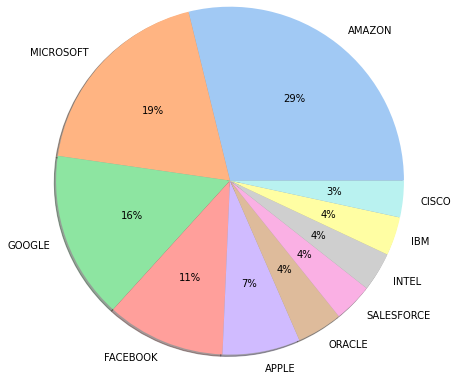

In [259]:
colors = sns.color_palette('pastel')[0:10]

plt.pie(companies['num_workers'], labels=companies['company'],
        colors = colors, autopct='%.0f%%', radius=2, shadow=True)
plt.show()

**Distribución por genero de los datos**

In [260]:
dataset['gender'].value_counts()

Male      35342
Female     6944
Other       395
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

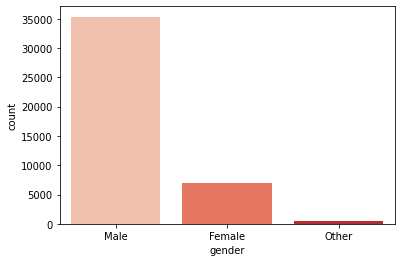

In [261]:
sns.countplot(data = dataset, x = 'gender', palette="Reds")

**Top de trabajos**

In [262]:
job_title = dataset["title"].value_counts()[0:10].reset_index()
job_title.columns = ["Job", "Count"]
job_title

,Job,Count
0,Software Engineer,28694
1,Product Manager,2993
2,Software Engineering Manager,2289
3,Data Scientist,1732
4,Hardware Engineer,1525
5,Product Designer,1141
6,Technical Program Manager,891
7,Solution Architect,804
8,Management Consultant,617
9,Business Analyst,518


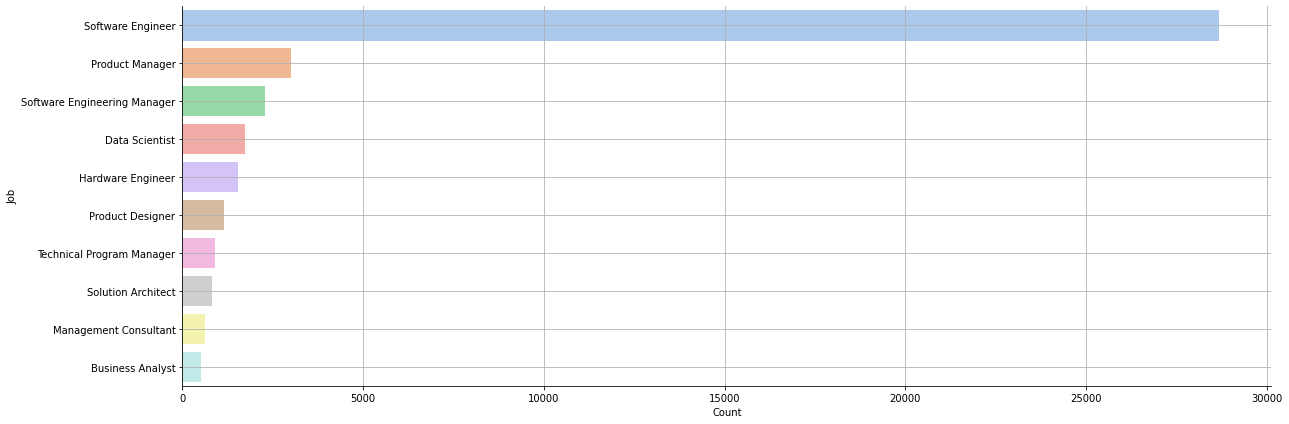

In [263]:
sns.catplot(x="Count", y="Job", kind="bar", data=job_title, height=6, aspect=3, palette = 'pastel')
plt.grid(True)

**Distribución del salario**

In [264]:
salary = []
salary.append({
    'type' : 'Base salary',
    'mean' : dataset['basesalary'].mean()
})
salary.append({
    'type' : 'Stock Value',
    'mean' : dataset['stockgrantvalue'].mean()
})
salary.append({
    'type' : 'Bonus',
    'mean' : dataset['bonus'].mean()
})
salary = pd.DataFrame(salary, columns = ['type','mean'])
salary

,type,mean
0,Base salary,139046.661129
1,Stock Value,49099.131259
2,Bonus,19021.679453


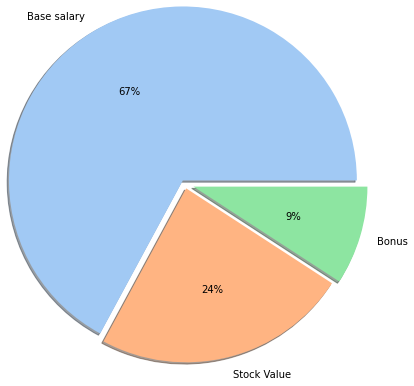

In [265]:
plt.pie(salary['mean'] , labels = salary['type'],autopct='%.0f%%' ,
        colors=colors[0:3], radius = 2 ,explode = (0.05,0.05, 0.1), shadow = True)
plt.show()

<AxesSubplot:xlabel='Race', ylabel='basesalary'>

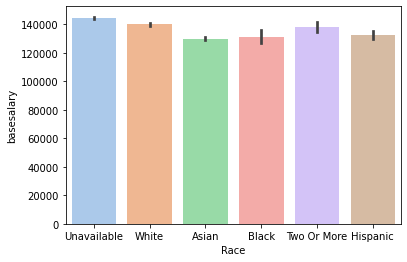

In [266]:
sns.barplot(x = dataset.Race, y = dataset.basesalary, palette = 'pastel')

Distribución 

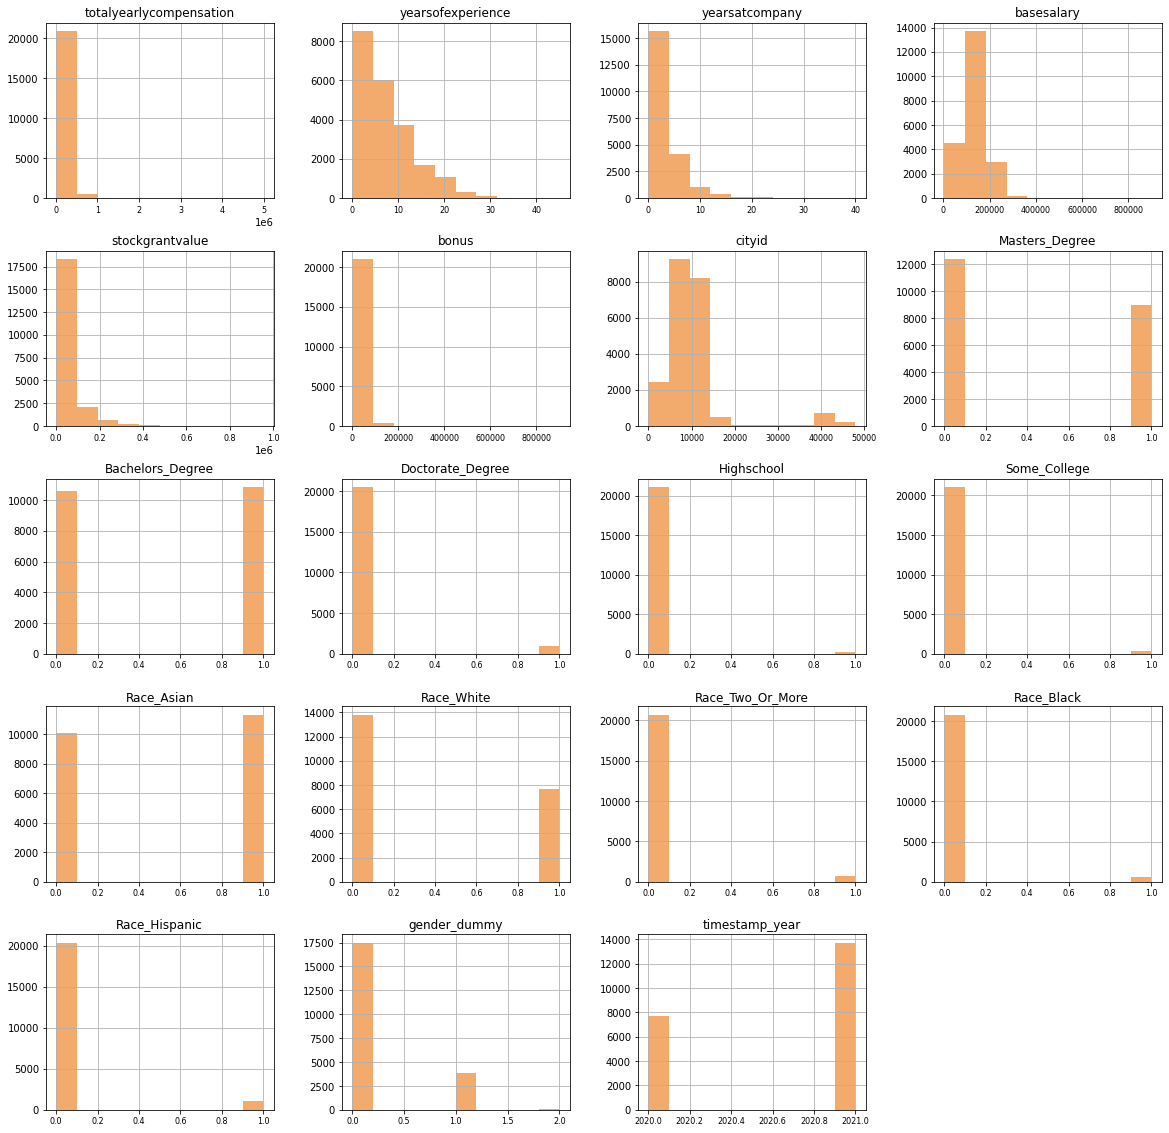

In [40]:
dataframe.hist(figsize=(20, 20), xlabelsize=8, ylabelsize=10, color='#F2AB6D')
plt.show()

In [267]:
tipos = dataframe.dtypes
numericas = tipos[tipos != object].index
no_numericas = tipos[tipos == object].index

In [268]:
numericas_nodummy = ['totalyearlycompensation', 'yearsofexperience', 'yearsatcompany',
                     'basesalary', 'stockgrantvalue', 'bonus']

Otras correcciones al DataFrame
* Vamos a eliminar algunos outliers en la variable que queremos estimar `basesalary`
* En lugar de tener el nombre de las compaías, haremos una variable dummy que nos diga si la persona pertenece a una FAANG COMPANY: **Facebook, Amazon, Apple, Netflix and Alphabet**

Para lo primero, usamos el rango intercuartilico

In [269]:
Q1 = dataframe[numericas_nodummy].quantile(q = .25)
Q3 = dataframe[numericas_nodummy].quantile(q = .75)
IQR = dataframe[numericas_nodummy].apply(stats.iqr)

In [270]:
dataframe = dataframe[~ ((dataframe <(Q1-1.5 * IQR)) | (dataframe> (Q3 + 1.5 * IQR))). any (axis = 1)]
dataframe.shape

C:\Users\latitude e5450\AppData\Local\Temp\ipykernel_8652\3719141476.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dataframe = dataframe[~ ((dataframe <(Q1-1.5 * IQR)) | (dataframe> (Q3 + 1.5 * IQR))). any (axis = 1)]


(18082, 23)

C:\Users\latitude e5450\Documents\Tzuzu Code\DataScienceAI\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\latitude e5450\Documents\Tzuzu Code\DataScienceAI\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\latitude e5450\Documents\Tzuzu Code\DataScienceAI\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without 

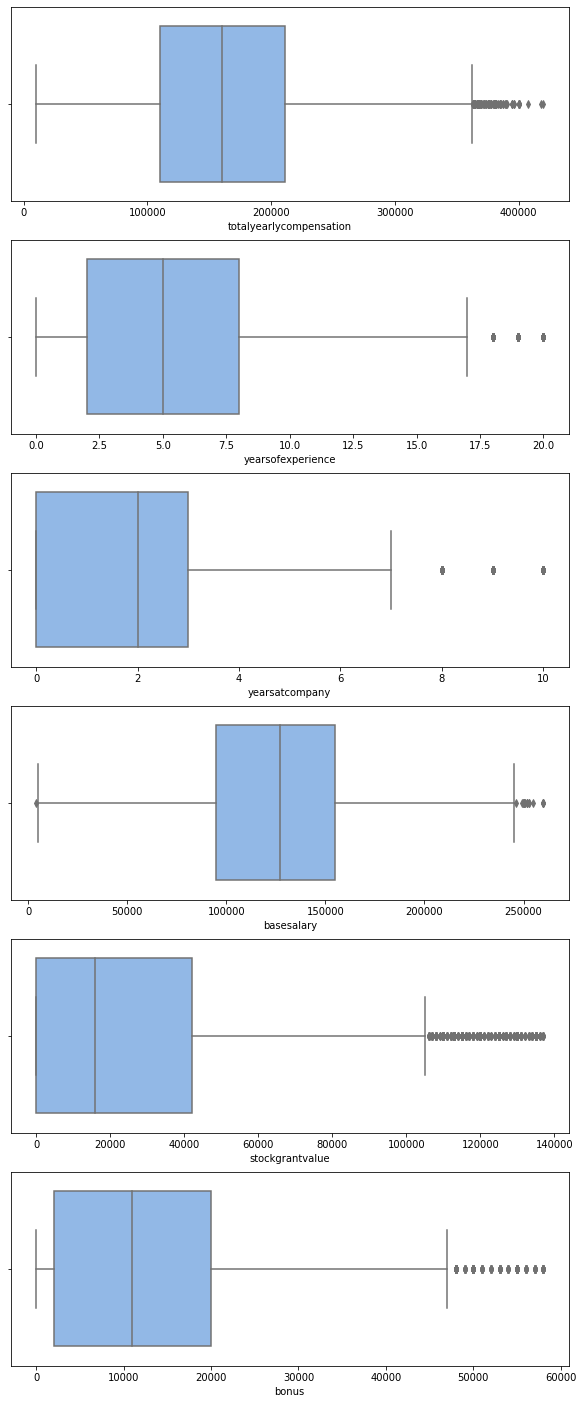

In [271]:
fig, axis = plt.subplots(len(numericas_nodummy), figsize=(10,25))
x = dataframe[numericas_nodummy]
for i, column in enumerate(x):
    sns.boxplot(dataframe[column], ax=axis[i],  color='#84B6F4')

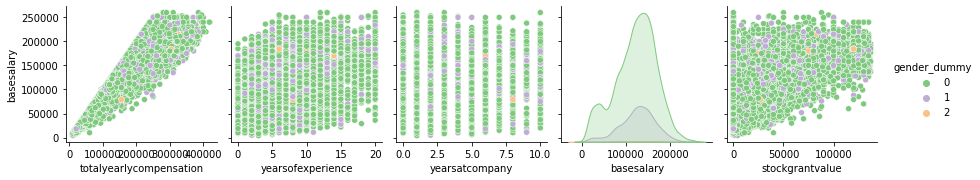

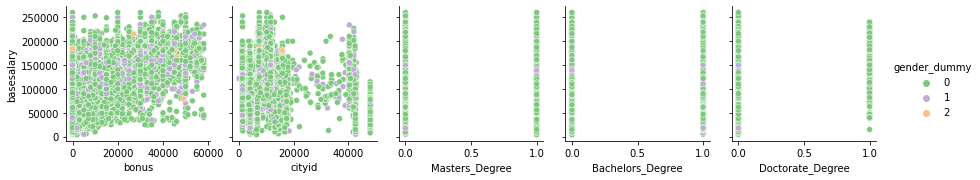

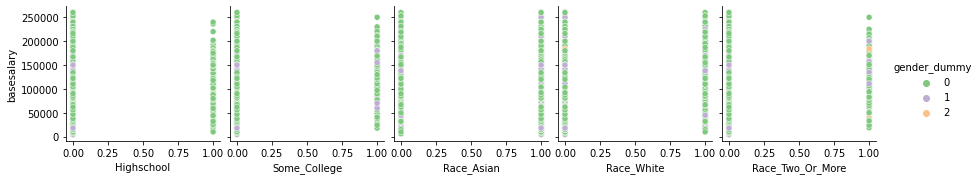

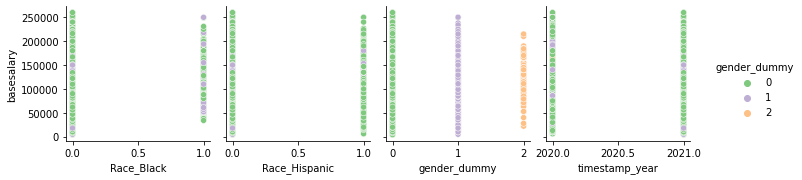

In [68]:
for i in range(0, len(dataframe[numericas].columns), 5):
    sns.pairplot(data=dataframe[numericas],
                x_vars=dataframe[numericas].columns[i:i+5],
                y_vars=['basesalary'], hue = 'gender_dummy',palette = 'Accent')

**Correlación**

<AxesSubplot:>

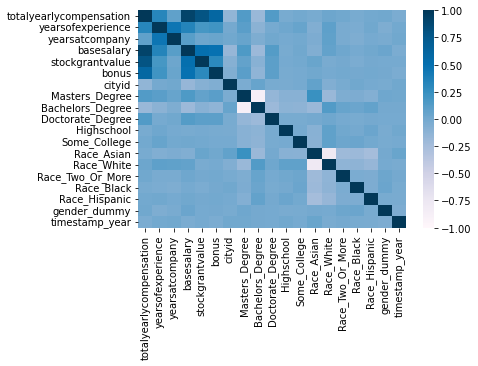

In [272]:
sns.heatmap(dataframe.corr(), vmin = -1, vmax = +1, cmap = 'PuBu')

In [273]:
# De nuestra a variable a pronosticar
corr = dataframe.corr()
corr[['basesalary']].sort_values(by = 'basesalary',ascending = False).style.background_gradient()

,basesalary
basesalary,1.000000
totalyearlycompensation,0.910979
stockgrantvalue,0.507825
bonus,0.488200
yearsofexperience,0.343188
Masters_Degree,0.152226
Doctorate_Degree,0.128634
yearsatcompany,0.109818
Race_White,0.065269
gender_dummy,0.037048


In [274]:
df = dataframe
df['FAANG'] = np.where(df['company'] == 'FACEBOOK', 1, 0)
df['FAANG'].mask(df['company'] == 'AMAZON' ,1, inplace=True)
df['FAANG'].mask(df['company'] == 'APPLE' ,1, inplace=True)
df['FAANG'].mask(df['company'] == 'NETFLIX' ,1, inplace=True)
df['FAANG'].mask(df['company'] == 'GOOGLE' ,1, inplace=True)


df.FAANG.value_counts(dropna=False)

0    13837
1     4245
Name: FAANG, dtype: int64

In [275]:
# Borramos las variables que no serviran para el modelo
df = df.drop(['company', 'location', 'tag'], axis = 1)

In [276]:
df.shape

(18082, 21)

# Modelling

Escojemos las variables:

In [277]:
df.columns

Index(['title', 'totalyearlycompensation', 'yearsofexperience',
       'yearsatcompany', 'basesalary', 'stockgrantvalue', 'bonus', 'cityid',
       'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree', 'Highschool',
       'Some_College', 'Race_Asian', 'Race_White', 'Race_Two_Or_More',
       'Race_Black', 'Race_Hispanic', 'gender_dummy', 'timestamp_year',
       'FAANG'],
      dtype='object')

In [278]:
df = df.drop(['title'], axis = 1)

In [279]:
df.columns

Index(['totalyearlycompensation', 'yearsofexperience', 'yearsatcompany',
       'basesalary', 'stockgrantvalue', 'bonus', 'cityid', 'Masters_Degree',
       'Bachelors_Degree', 'Doctorate_Degree', 'Highschool', 'Some_College',
       'Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Black',
       'Race_Hispanic', 'gender_dummy', 'timestamp_year', 'FAANG'],
      dtype='object')

## Primer regresión lineal múltiple 

In [280]:
outcome = 'basesalary'
variables = ['yearsofexperience', 'yearsatcompany','stockgrantvalue', 'bonus',
             'Masters_Degree','Bachelors_Degree', 'Doctorate_Degree', 'Highschool',
             'gender_dummy', 'timestamp_year', 'FAANG']

lm = LinearRegression()
lm.fit(df[variables],df[outcome])

LinearRegression()

In [281]:
b0 = stem_lm.intercept_
betas = []
print('Intercept: ',b0 )
print('')
print('Coefficients:')
for name, coef in zip(variables, stem_lm.coef_):
    betas.append(coef)
    print(f' {name}: {coef:.5f}')

Intercept:  4820.647336881134

Coefficients:
 yearsofexperience: 3.48934
 yearsatcompany: -0.94202
 stockgrantvalue: -0.00079
 bonus: 14.53111
 Masters_Degree: 0.68522
 Bachelors_Degree: 36.64767
 Doctorate_Degree: -7.44315
 Highschool: 3.31828
 gender_dummy: 26.36778
 timestamp_year: 33.19153
 FAANG: 37.09731


In [282]:
fitted = lm.predict(df[variables])

In [283]:
model = sm.OLS(df[outcome], df[variables].assign(const=1))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             basesalary   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     1291.
Date:                Tue, 31 May 2022   Prob (F-statistic):               0.00
Time:                        17:04:54   Log-Likelihood:            -2.1439e+05
No. Observations:               18082   AIC:                         4.288e+05
Df Residuals:                   18070   BIC:                         4.289e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
yearsofexperience  2020.6527     64.31

## Stepwise regression

In [284]:
outcome = 'basesalary'
variables = ['yearsofexperience', 'yearsatcompany','stockgrantvalue', 'bonus', 'cityid', 'Masters_Degree',
       'Bachelors_Degree', 'Doctorate_Degree', 'Highschool', 'Some_College',
       'Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Black',
       'Race_Hispanic', 'gender_dummy', 'timestamp_year', 'FAANG']

In [285]:
y = df[outcome]

def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(df[variables], y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        # En caso de no tener 
        return AIC_score(y, [y.mean()] * len(y), model, df=1)
    return AIC_score(y, model.predict(df[variables]), model)

best_model, best_variables = stepwise_selection(variables, train_model, score_model, 
                                                verbose=True)
print(' ')
print(f'Intercept: {best_model.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(best_variables, best_model.coef_):
    print(f' {name}: {coef}')

Variables: yearsofexperience, yearsatcompany, stockgrantvalue, bonus, cityid, Masters_Degree, Bachelors_Degree, Doctorate_Degree, Highschool, Some_College, Race_Asian, Race_White, Race_Two_Or_More, Race_Black, Race_Hispanic, gender_dummy, timestamp_year, FAANG
Start: score=439263.91, constant
Step: score=433872.90, add stockgrantvalue
Step: score=430578.90, add bonus
Step: score=429354.27, add yearsofexperience
Step: score=428968.33, add cityid
Step: score=428730.47, add Bachelors_Degree
Step: score=428490.98, add Race_Asian
Step: score=428379.03, add FAANG
Step: score=428297.54, add gender_dummy
Step: score=428237.31, add Doctorate_Degree
Step: score=428189.31, add Masters_Degree
Step: score=428182.28, add yearsatcompany
Step: score=428175.60, add Some_College
Step: score=428170.27, add timestamp_year
Step: score=428170.27, unchanged None
 
Intercept: 2936225.293
Coefficients:
 stockgrantvalue: 0.5395027109902352
 bonus: 1.1383005907477184
 yearsofexperience: 1957.9605316355487
 cityi

In [286]:
selected_data = df[['stockgrantvalue', 'bonus', 'yearsofexperience',
                'cityid', 'Bachelors_Degree', 'Race_Asian', 
                'FAANG', 'gender_dummy', 'Doctorate_Degree',
                  'Masters_Degree','yearsatcompany', 'timestamp_year']]

In [220]:
best_model = sm.OLS(df[outcome],selected_data.assign(const=1))
results = best_model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             basesalary   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     1278.
Date:                Tue, 31 May 2022   Prob (F-statistic):               0.00
Time:                        16:15:28   Log-Likelihood:                 35738.
No. Observations:               18082   AIC:                        -7.145e+04
Df Residuals:                   18069   BIC:                        -7.135e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
stockgrantvalue    5.398e-07   8.93e-0

## Evaluación del modelo